In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Model PCA
class PCA:
    
# Initailizing 
# >> default Dimensions from dataset (dimensions == columns) 
# >> Mean of the Dataset (Independent Variables)
# >> number of dimensions required 

    def __init__(self, dimensions):
        self.number_of_dimensions = dimensions
        self.dimensions = None
        self.mean = None
        
 # Replicating functions of Sklearn such as fit and transform with numpy implementation
    def fit(self, independent_variables):
        # Find Mean of independent variables
        self.mean = np.mean(independent_variables,axis=0)
        
        # Variance (subtracting mean from the independent variables)
        X = independent_variables - self.mean 
        
        # Finding Co-variance to understand the correlation between dimensions
        covariance = np.cov(X.T)
        
        # Finding eigen Values and eigenvectors from co-variance matrix
        eigenvalues , eigenvectors = np.linalg.eig(covariance)
        
        # Transpose the matrix (Transformation done for indexing)
        eigenvectors = eigenvectors.T
        
        # Reverse sort the eigen values to get the important features
        index = np.argsort(eigenvalues)[::-1]
        
        # getting the values from eigen vectors using eigen values as index
        eigenvectors = eigenvectors[index]
        eigenvalues = eigenvalues[index]
        # store first n eigenvectors
        self.dimensions = eigenvectors[0:self.number_of_dimensions]

    def transform(self, independent):
        # project data
        independent_variables = independent - self.mean
        return np.dot(independent_variables, self.dimensions.T)

In [3]:
# Input data path 
data_path = "./data/train.csv"

# Read the dataset as Pandas Dataframe 
df = pd.read_csv(data_path)

# Store the dependent variable (y)
y = df["label"]

# remove the dependent variable (y) (axis=1 : column)
df = df.drop("label",axis=1)

# Data Preview (Just to make sure the Import is sucessfull)
df.head(4)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  

[4 rows x 784 columns]

In [4]:
# convert the dataframe to Numpy array (Matrix)
X = np.array(df)
rows,columns = X.shape
# columns == dimensions
print("[INFO] There are {0} rows amd {1} columns in the dataset".format(rows,columns))

[INFO] There are 42000 rows amd 784 columns in the dataset


In [5]:
# Required dimensions as per task given
required_dimensions = 2

# Creating an instance of PCA with required dimensions
pca = PCA(required_dimensions)

In [6]:
pca.fit(X)

In [7]:
X_projected = pca.transform(X)

In [8]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (42000, 784)
Shape of transformed X: (42000, 2)


<IPython.core.display.Javascript object>


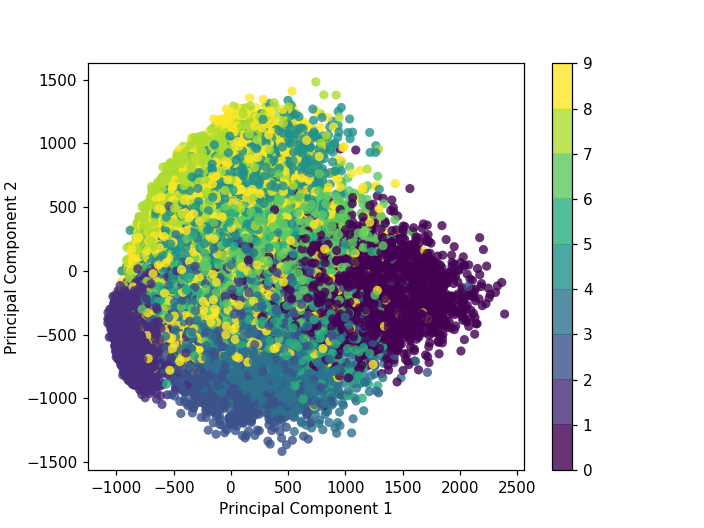

In [9]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 9))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()